<a href="https://colab.research.google.com/github/MarianoNCrz/Proyects/blob/main/Calendario_de_cumplea%C3%B1itos_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calendario de cumpleaños de la familia**

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# cargo los cumpleañitos:
datos = {
    "Enero": ["12 - Tía Ana Abregú Mussatti", "19 - Tío Pablo Hinojosa"],
    "Febrero": ["07 - Primo Guillermo Manso", "13 - Prima Nur Chein"],
    "Marzo": [],
    "Abril": ["09 - Primo Xián Sanchez", "13 - Prima Victoria Hinojosa"],
    "Mayo": ["12 - Primo Pablito Hinojosa", "18 - Tío Alberto Hinojosa", "28 - Prima Agostina Alderete"],
    "Junio": ["11 - Primo Lion Sanchez", "12 - Anabella Cruz", "14 - Tía Patricia Alderete"],
    "Julio": [],
    "Agosto": ["12 - Papá Carlos Alderete", "29 - Primo Tomas Tombesi"],
    "Septiembre": [
        "09 - Tío Franco Sanchez (Esposo Connie)",
        "09 - Tío Javier Tombesi",
        "11 - Hermano Sebastián Alderete",
        "18 - Hermana Luciana Cruz",
        "18 - Tía Dolores Abregú Mussatti"
    ],
    "Octubre": [
        "09 - Prima Justina Hinojosa",
        "09 - Sobrino Santino Cano Cruz",
        "12 - Tía Amelia González (Esposa Pablo Hinojosa)",
        "25 - Prima Martina Tombesi",
        "26 - Papá Juan Cruz",
        "28 - Mamá Liliana Abregú Mussatti"
    ],
    "Noviembre": [
        "03 - Hermana Florencia Alderete",
        "05 - Tía Adriana Abregú Mussatti",
        "11 - Cecilia Berardi (Esposa Papá)",
        "23 - Prima Lucia Manso"
    ],
    "Diciembre": ["02 - Tío Daniel Alderete", "24 - Tía Connie Alderete"]
}

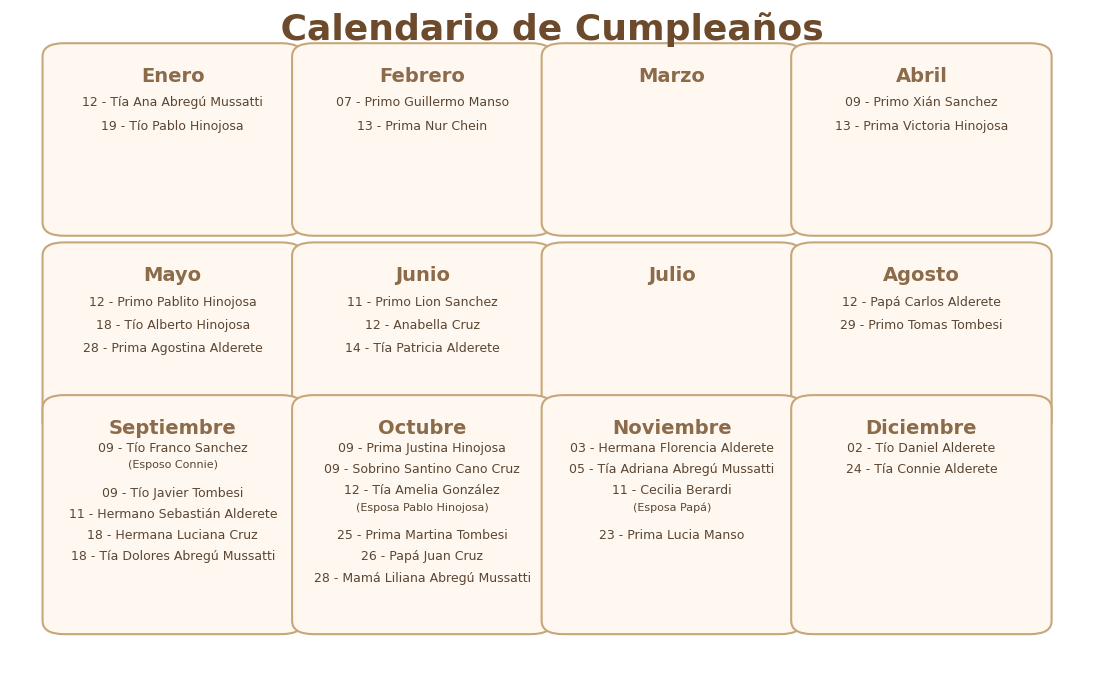

In [4]:
# configuración visual (no es mi fuerte, pero es trabajo honesto)
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor("#FAF2E8")
plt.axis("off")

# posiciones de los meses (no tocar)
posiciones = {
    0: (0.05, 0.68), 1: (0.28, 0.68), 2: (0.51, 0.68), 3: (0.74, 0.68),
    4: (0.05, 0.38), 5: (0.28, 0.38), 6: (0.51, 0.38), 7: (0.74, 0.38),
    8: (0.05, 0.08), 9: (0.28, 0.08), 10: (0.51, 0.08), 11: (0.74, 0.08)
}

# tamaño de los meses
ancho = 0.20
alto_peque = 0.25         # tamaño original para Ene-Ago
alto_grande = 0.32        # mayor para Sep-Dic

# título
plt.text(0.5, 0.97, " Calendario de Cumpleaños ", ha="center", va="center",
         fontsize=26, color="#6C4A2B", fontweight="bold")

# mes
for i, (mes, lista) in enumerate(datos.items()):
    x, y = posiciones[i]

    # aquí modifico el tamaño de sept a dic. para que entren todos los nombres
    if mes in ["Septiembre", "Octubre", "Noviembre", "Diciembre"]:
        alto = alto_grande
        titulo_y = y + alto - 0.03
        # la lista más abajo dentro del recuadro (para que no se pegue al título)
        inicio_texto = y + 0.27         # coordenada base para Sep-Dic (funciona bien con alto_grande)
        linea_normal = 0.032            # salto entre líneas normales
        linea_paren_1 = 0.028
        linea_paren_2 = 0.040
    else:
        alto = alto_peque
        titulo_y = y + alto - 0.03
        # ESTE es el valor que restablece el comportamiento original (enero-agosto)
        inicio_texto = y + 0.19
        linea_normal = 0.035            # salto original para Ene-Ago
        linea_paren_1 = 0.028
        linea_paren_2 = 0.040

    # recuadro (misma posición x,y, solo cambia alto)
    ax.add_patch(patches.FancyBboxPatch((x, y), ancho, alto,
                                        boxstyle="round,pad=0.02", linewidth=1.5,
                                        edgecolor="#C7A67A", facecolor="#FFF8F0"))

    # nombre del mes (en la parte superior del recuadro)
    plt.text(x + ancho/2, titulo_y, mes, ha="center", va="center",
             fontsize=14, color="#8B6B4A", fontweight="bold")

    # lista de cumpleaños dentro del recuadro, cuidando paréntesis y saltos
    if lista:
        offset = 0.0
        for persona in lista:
            # si hay paréntesis, separo en dos líneas
            if "(" in persona and ")" in persona:
                nombre = persona.split("(")[0].strip()
                extra = "(" + persona.split("(")[1].strip()

                # línea con nombre (antes del paréntesis)
                plt.text(x + ancho/2, inicio_texto - offset, nombre,
                         ha="center", va="top", fontsize=9, color="#5A4633", wrap=True)
                offset += linea_paren_1

                # línea con lo de dentro del paréntesis (más pequeña)
                plt.text(x + ancho/2, inicio_texto - offset, extra,
                         ha="center", va="top", fontsize=8, color="#5A4633", wrap=True)
                offset += linea_paren_2

            else:
                # línea normal
                plt.text(x + ancho/2, inicio_texto - offset, persona,
                         ha="center", va="top", fontsize=9, color="#5A4633", wrap=True)
                offset += linea_normal

# título no se corte en el PDF/imagen
plt.subplots_adjust(top=0.94)

# Guardar como PDF de alta calidad
plt.savefig("Calendario de cumpleaños.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()